In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib as plt
import itertools
import os
import community
import csv
from collections import defaultdict
from sklearn.metrics.cluster import normalized_mutual_info_score

from random import random 
%matplotlib inline

In [294]:
def draw_network(G):
    groups = get_groups(G)
    colors = [(random(), random(), random()) for i in range(len(groups.keys()))]
    pos = nx.spring_layout(G)
    for i, key in enumerate(groups.keys()):
#         print("Drawing nodes: " + groups[key])
        nodelist = [str(i) for i in groups[key]]
        nx.draw_networkx_nodes(G, pos, nodelist = nodelist, node_color=colors[i], node_size=500)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)


In [295]:
def initialize_labels(G):
    for i in range(1, G.number_of_nodes()+1):
        G.node[str(i)]['label'] = i
    return G

In [296]:
def get_groups(G):
    groups = defaultdict(list)
    # For each remaining group, create a list of nodes which belong to that group
    for i in range(1, G.number_of_nodes() + 1):
        groups[G.node[str(i)]['label']].append(i)
    return groups

In [297]:
def initialize_Q(G):
    modularity = 0
    degrees = G.degree()
    m = G.number_of_edges()
    for key in degrees.keys():
        modularity -= (degrees[key]/(2 * m))**2
    return modularity

In [298]:
def merge(G, merge_labels):
    groups = get_groups(G)
    min_merge = min(merge_labels)
    max_merge = max(merge_labels)
    if min_merge not in groups.keys() or max_merge not in groups.keys():
        print("FAILURE")
    for i in range(1, G.number_of_nodes()+1):
        if G.node[str(i)]['label'] == int(max_merge):
            G.node[str(i)]['label'] = int(min_merge)
    return G

In [299]:
def get_adjacency_matrix():
    A_Mat = np.zeros((34, 34))
    with open('zkcc-77/karate_edges_77.txt', 'r')as f:
        reader = csv.reader(f, delimiter= '\t')
        for row in reader:
            A_Mat[int(row[0]) - 1, int(row[1])-1] = 1
    return A_Mat

In [300]:
def get_e_matrix(G):
    A = get_adjacency_matrix()
    a_idx = A.shape[0]
    groups_dict = get_groups(G)
    e_mat = np.zeros((len(groups_dict.keys()), len(groups_dict.keys())))
    m = G.number_of_edges()
    num_groups = len(groups_dict.keys())
    groups_key = list(groups_dict.keys())
    for u in range(num_groups):
        for v in range(num_groups):
            # increment index of e matrix
            for i in range(a_idx): # in range 34
                for j in range(a_idx): # in range 34
                    # add one to everything because ther is no 0 node
#                     existing_group1 = groups_key[u+1]
                    if i+1 in groups_dict[groups_key[u]] and j+1 in groups_dict[groups_key[v]]:
                        e_mat[u, v] += A[i, j]
            e_mat[u][v] = e_mat[u][v]/(2*m)
    return e_mat

In [367]:
def calc_delta_Q(e_mat, G):
    best_pair = (-1, -1)
    best_dQ = -1
    idx = e_mat.shape[0]
    groups_dict = get_groups(G)
    groups_key = list(groups_dict.keys())
    for u in range(idx - 1):
        a_u=np.sum(e_mat[u])
        for v in range(u + 1, idx): # v equals 17th row of e_matrix
            a_v=np.sum(e_mat[v])
            dQ = 2*(e_mat[u, v] - a_u * a_v)
            if dQ > best_dQ:
                best_dQ = dQ
                best_pair = (groups_key[u], groups_key[v])
    return best_pair, best_dQ

In [368]:
def greedy_algorithm():
    G = nx.read_edgelist('zkcc-77/karate_edges_77.txt')
    G = initialize_labels(G)
    Q = initialize_Q(G)
    Q_list = [Q]
    merge_list = []
    groups = get_groups(G)
    prev_best_pairs = None
    prev_len = len(groups) + 1
    while len(groups) > 2:
#         print(groups)
        prev_len = len(groups)
        e_mat = get_e_matrix(G)
        best_pairs, dQ = calc_delta_Q(e_mat, G)
        Q += dQ
        Q_list.append(Q)
        G = merge(G, best_pairs)
        merge_list.append(best_pairs)
        groups = get_groups(G)
        prev_best_pairs = best_pairs
        
    return merge_list, Q_list, G

In [369]:
merge_list, Q_list, G = greedy_algorithm()

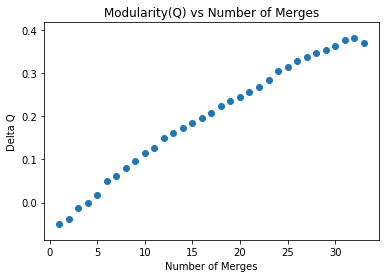

In [371]:
from pylab import *
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
merges = [i for i in range(1, len(Q_list)+1)]
ax.scatter(merges, Q_list)

# plt.yscale('log')
plt.title('Modularity(Q) vs Number of Merges')
plt.xlabel('Number of Merges')
plt.ylabel("Delta Q")

In [343]:
draw_network(G)

In [233]:
groups = get_groups(G)
groups

defaultdict(list,
            {1: [1],
             2: [2],
             3: [3],
             4: [4],
             5: [5],
             6: [6, 17],
             7: [7],
             8: [8],
             9: [9],
             10: [10],
             11: [11],
             12: [12],
             13: [13],
             14: [14],
             15: [15],
             16: [16],
             18: [18],
             19: [19],
             20: [20],
             21: [21],
             22: [22],
             23: [23],
             24: [24],
             25: [25],
             26: [26],
             27: [27],
             28: [28],
             29: [29],
             30: [30],
             31: [31],
             32: [32],
             33: [33],
             34: [34]})

In [357]:
draw_network(G)

In [356]:
A = nx.adj_matrix(G)

A= A.todense()
for i in range(34):
    print(A[i])

[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0]]
[[0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0]]
[[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
[[0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0]]
[[0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]]
[[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 

In [372]:
def get_NMI(G):
    # red is 1, blue is 0
    true_labels = []
    groups = get_groups(G)
    group1 = groups[1]
    pred_labels = []

    for i in range(1, 34):
        if i in red:
            true_labels.append(1)
        else:
            true_labels.append(0)
        if i in group1:
            pred_labels.append(0)
        else:
            pred_labels.append(1)
            
    return normalized_mutual_info_score(pred_labels, true_labels)

In [374]:
total = [i for i in range(1, 35)]
red = [22, 18, 20, 8, 2, 4, 1, 3, 13, 6, 7, 5, 12, 14, 9, 17, 11]
blue = [i for i in total if i not in red]

red = sorted(red)
blue = sorted(blue)
print(red)
print(blue)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 17, 18, 20, 22]
[10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


In [376]:
nmi = get_NMI(G)
nmi

0.66997804767701563

In [377]:
groups = get_groups(G)

In [378]:
groups

defaultdict(list,
            {1: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 17, 18, 20, 22],
             9: [9,
              15,
              16,
              19,
              21,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34]})

In [359]:
A = get_adjacency_matrix()

In [360]:
for i in range(34):
    print(A[i])

[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  0.  1.
  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.
  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 1.  1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.]
[ 1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  0.  0.  0

In [76]:
G = nx.read_edgelist('zkcc-77/karate_edges_77.txt')
A=nx.adjacency_matrix(G).todense()
G = initialize_labels(G)

In [82]:
A[11, 1]

0

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


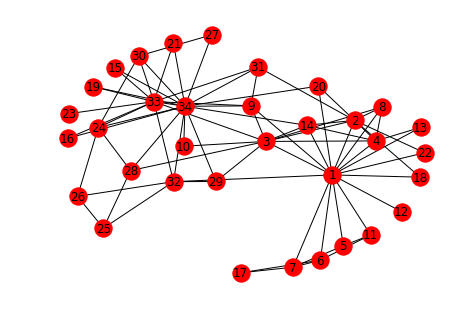

In [77]:
nx.draw(G, with_labels=True)

In [75]:
for i in range(34):
    print(A[i])

[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0]]
[[0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0]]
[[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
[[0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0]]
[[0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]]
[[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 

In [70]:
B = nx.adjacency_matrix(G)

In [71]:
A == B

matrix([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ..., 
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [88]:
A_Mat = np.zeros((34, 34))


(34, 34)

In [105]:
G.number_of_edges()


77

In [103]:
ctr = 0
with open('zkcc-77/karate_edges_77.txt', 'r')as f:
    reader = csv.reader(f, delimiter= '\t')
    for row in reader:
        ctr += 1
ctr/2

77.0

In [136]:
A = get_adjacency_matrix()

In [139]:
for i in range(34):
    print(A[i, i] == 0)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
